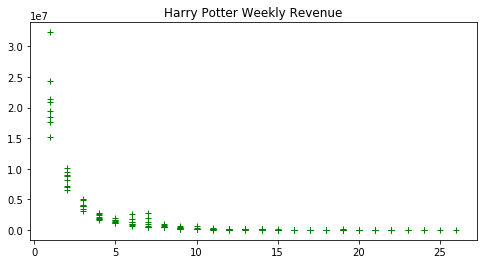

Best fit a=4.8e+07, b=0.436
R2=0.937


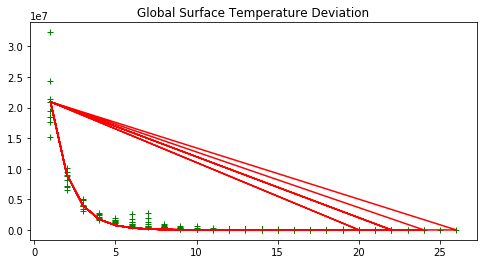

In [8]:
import numpy as np     # because it's numpy
import pandas as pd    # data library
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define a model
def theModel(weeks, a,b):
    return a * np.power(b,weeks)


# get data
df = pd.read_csv( "http://explorer.bee.oregonstate.edu/Data/harrypotter.csv" );

weeks = df['weeknum']
revs = df['revperday']


plt.figure(figsize=(8,4))
plt.plot( weeks, revs, "+", color="green")
plt.title( "Harry Potter Weekly Revenue")
plt.show()


# run nonlinear regression with curve_fit()
popt,pcov = curve_fit( theModel, weeks, revs )

a = popt[0]
b = popt[1]

# compute r-square value
xObs = weeks
yObs = revs
yMean = np.mean( revs )
yModeled = theModel( xObs, a,b )

sst = np.sum( (yObs-yMean)**2 )
ssr = np.sum( (yObs-yModeled)**2)  
r2 = 1-ssr/sst

print( "Best fit a={:.3}, b={:.3}".format(a,b))
print("R2={:.3}".format(r2))


plt.figure(figsize=(8,4))
plt.plot( xObs, yObs, "+", color="green")
plt.plot( xObs, yModeled, "-", color="red")
plt.title( "Hary Potter - Fitted Expoential Model")
plt.show()

